# Business Understanding

# Data Understanding

# Data Analysis #1: Namita

# Modeling for Namita

# Data Analysis #3: Jose

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from statsmodels.formula.api import ols
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import scipy.stats as stats
import pickle

Ho= believe that the increase in the amount of bedrooms, bathrooms,year built and square footage will lead to an increase in sale price

# Exploring Data: Model 1

In [2]:
df = pd.read_csv('data/kc_house_data.csv', index_col=0)
df


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [61]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [62]:
df.median()

price            450000.0000
bedrooms              3.0000
bathrooms             2.2500
sqft_living        1910.0000
sqft_lot           7618.0000
floors                1.5000
sqft_above         1560.0000
yr_built           1975.0000
yr_renovated          0.0000
zipcode           98065.0000
lat                  47.5718
long               -122.2310
sqft_living15      1840.0000
sqft_lot15         7620.0000
dtype: float64

In [4]:
df.drop(columns=['waterfront','yr_renovated','view','lat','long']) 
#dropped collumns to not use that data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,Average,7 Average,1180,0.0,1955,98178,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,Average,7 Average,2170,400.0,1951,98125,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,Average,6 Low Average,770,0.0,1933,98028,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,Very Good,7 Average,1050,910.0,1965,98136,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,Average,8 Good,1680,0.0,1987,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,Average,8 Good,1530,0.0,2009,98103,1530,1509
6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,Average,8 Good,2310,0.0,2014,98146,1830,7200
1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,Average,7 Average,1020,0.0,2009,98144,1020,2007


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [6]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [7]:
df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [8]:
df['sqft_living'].value_counts()

1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64

# Exploring Data: Model 1

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

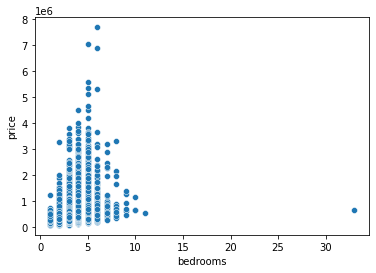

In [63]:
sns.scatterplot(x = df['bedrooms'], y=df['price'])
#Optimum amount of bedrooms is 5-6


In [66]:
df.loc[df['bedrooms'] == 33]


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,Very Good,7 Average,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [71]:
df=df.drop(2402100895)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

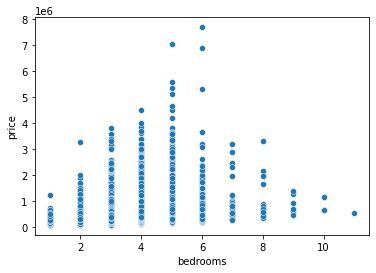

In [72]:
sns.scatterplot(x = df['bedrooms'], y=df['price'])


<AxesSubplot:xlabel='bathrooms', ylabel='price'>

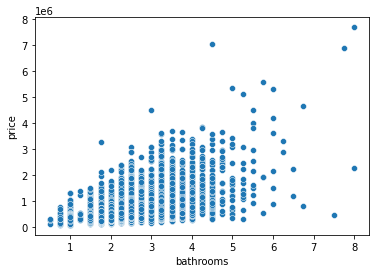

In [64]:
sns.scatterplot(x=df['bathrooms'], y=df['price'])


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

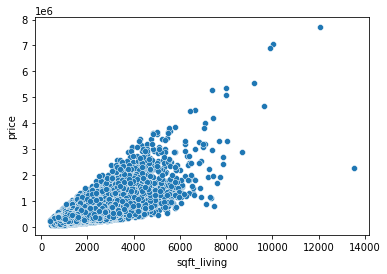

In [65]:
sns.scatterplot(x=df['sqft_living'], y=df['price'])
#

In [67]:
df['sqft_living'].max()

13540

In [68]:
df.loc[df['sqft_living'] == 13540]


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
1225069038,5/5/2014,2280000.0,7,8.0,13540,307752,3.0,NO,EXCELLENT,Average,12 Luxury,9410,4130.0,1999,0.0,98053,47.6675,-121.986,4850,217800


In [69]:
df=df.drop(1225069038)

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

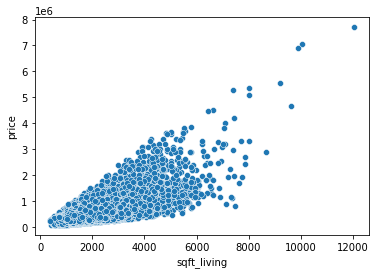

In [70]:
sns.scatterplot(x=df['sqft_living'], y=df['price'])


In [14]:
price_median = df['price'].median()
price_median

450000.0

In [56]:
X = df_explore1.drop('price', axis=1)
y = df['price']


## Test/Train Split: Model 1

Test Train Split: 20% of our data shall be used for testing and 80% will be used for training.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,date,bedrooms,bathrooms,sqft_living
id,,,,
9834201100,12/22/2014,4,2.00,1440
7795810110,5/12/2015,3,1.75,1430
1853081250,12/29/2014,4,2.75,3120
2558630350,3/21/2015,4,2.50,2060
3362401000,7/1/2014,3,2.00,2500
...,...,...,...,...
7853230570,9/15/2014,3,2.50,2230
4140940150,10/2/2014,4,2.75,2770
8658300480,7/21/2014,4,1.50,1530


## Modeless Baseline: Model 1

In [58]:
base_train_mean = y_train.mean()
base_train_mean

541519.0094345083

In [59]:
base_train_preds = [base_train_mean] * len(y_train)
base_test_preds = [base_train_mean] * len(y_test)

In [60]:
print(f"Train R2: {r2_score(y_train, base_train_preds)}")
print(f"Test R2: {r2_score(y_test, base_test_preds)}")
print('----')
print(f"Train RMSE: {mean_squared_error(y_train, base_train_preds, squared = False)}")
print(f"Test RMSE: {mean_squared_error(y_test, base_test_preds, squared = False)}")

Train R2: 0.0
Test R2: -0.00028681792529150485
----
Train RMSE: 368958.0485742971
Test RMSE: 360906.67557791865


**This baseline model predicts that each house would have a value of the mean for this area. Since the model has a very low R2 and predicts that this is off by ~361 thousand dollars on average.**

## Independent Variables & Their Relation To Price: Model 1

In [73]:
# create a dataframe for training data
df_train1 =pd.concat([y_train, X_train], axis = 1)
df_train1

,price,date,bedrooms,bathrooms,sqft_living
id,,,,,
9834201100,332500.0,12/22/2014,4,2.00,1440
7795810110,390000.0,5/12/2015,3,1.75,1430
1853081250,800000.0,12/29/2014,4,2.75,3120
2558630350,462000.0,3/21/2015,4,2.50,2060
3362401000,695000.0,7/1/2014,3,2.00,2500
...,...,...,...,...,...
7853230570,440000.0,9/15/2014,3,2.50,2230
4140940150,572000.0,10/2/2014,4,2.75,2770
8658300480,299800.0,7/21/2014,4,1.50,1530


In [74]:
# pick the variables we are interested in and numeric
# see correlations between them and the target
df_explore1 = df.drop(['sqft_lot','floors','waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 'sqft_basement','yr_renovated', 'zipcode', 'lat','long','sqft_living15','sqft_lot15'],axis=1)


In [75]:
df_explore1.corr()['price'].sort_values(ascending=False)

price          1.000000
sqft_living    0.702092
bathrooms      0.525222
bedrooms       0.315362
Name: price, dtype: float64

Out of the 3 variables we compared to price, sqft_living has the highest correlation.


<AxesSubplot:>

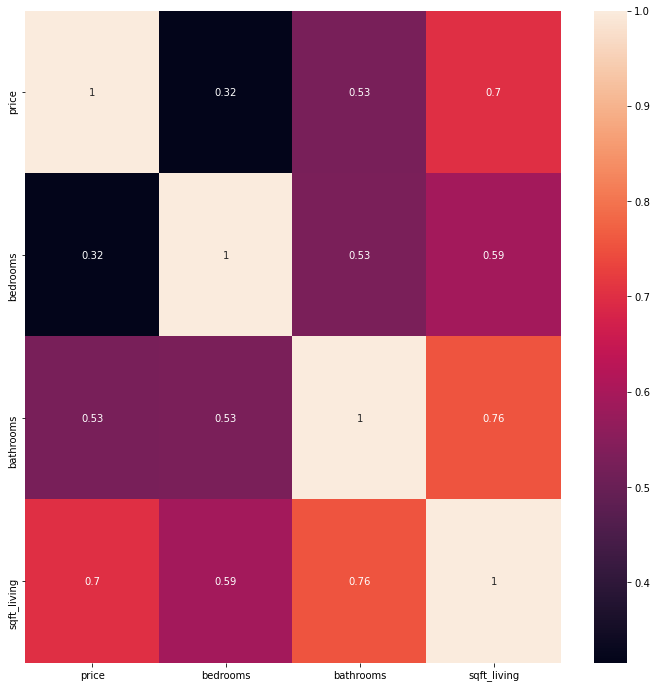

In [77]:
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_explore1.corr(), annot=True)

# Modeling: Model 1
## Simple Model 
Sqft_living has the highest correlation with price so this shall be used for our model.


In [52]:
simple_formula='price ~ sqft_living'
simple_model = ols(simple_formula, df_explore1).fit()
simple_model_summ = simple_model.summary()
simple_model_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:27:18   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
simple_train_preds=simple_model.predict(X_train)
simple_test_preds=simple_model.predict(X_test)

In [78]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Multiple Regression: Model 1

In [93]:
simple_formula='price ~ sqft_living + bedrooms + bathrooms'
simple_model = ols(simple_formula, df_explore1).fit()
simple_model_summ = simple_model.summary()
simple_model_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     7456.
Date:                Wed, 05 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:58:47   Log-Likelihood:            -2.9968e+05
No. Observations:               21595   AIC:                         5.994e+05
Df Residuals:                   21591   BIC:                         5.994e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.571e+04   7059.355     12.142      0.000    7.19e+04    9.96e+04
sqft_living   314.0874      3.117    100.760      0.000     307.978     320.197
bedrooms    -6.429e+04   2434.741    -26.404      0.000   -6.91e+04   -5.95e+04
bathrooms    8513.2199   3518.319      2.420      0.016    1617.056    1.54e+04
==============================================================================
Omnibus:                    14279.053   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           472968.409
Skew:                           2.705   Prob(JB):                         0.00
Kurtosis:                      25.280   Cond. No.                     9.52e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""